# 宿題2

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [21]:
data = loadmat('../Data/digit.mat')
test_data = np.array(data['T'])
test_data = test_data.transpose(2, 1, 0)
train_data = np.array(data['X'])
train_data = train_data.transpose(2, 1, 0)

def calc_distances(X, T):
    # 各数字ごと
    distances = []
    print(f'calculating...')
    for i, t in enumerate(T):
        distances_each_num = []
        for _t in t:
            dis = []
            # 各テストデータごとに全てのテストデータに対して距離を計算.
            for j, x in enumerate(X):
                d = [np.linalg.norm(_t - _x) for _x in x]
                dis.append(d)
                
            distances_each_num.append(dis)
        distances.append(distances_each_num)
    
    return np.array(distances)

## knnを用いて各ラベルへの確率を計算

In [22]:
def knn(distances, ks):
    all_predictions = []
    from copy import deepcopy
    distances_copy = deepcopy(distances)
    for d in distances_copy:
        predictions = []
        for each_test in d:
            temp = []
            for k in range(ks):
                min_label  = np.where(each_test == np.min(each_test))
                temp.append(min_label[0])
                each_test[min_label] = 100 + k
            
            ans = np.argmax(temp)
            predictions.append(temp[ans])
        all_predictions.append(predictions)

    return np.array(all_predictions)

In [35]:
def calc_accuracy(disances, k, show_log = False):
    result = knn(disances, k)
    precisions = 0
    for i, p in enumerate(result):
        precisions += len(p[p==i])/len(p)
        if show_log:
            print(f'Accucacy of {i+1 if i != 9 else 0}: {len(p[p==i])/len(p)}')
    
    if show_log:
        print(f'Accuracy all {precisions/10}')
    return precisions/10

## 交差検証

In [36]:
def cross_validation(train_data, split_num):
    all_accuracy = []
    train_split =  np.array(np.split(train_data, split_num, axis=1))
    for j in range(split_num):
        accuracy_j = 0
        for i in range(split_num):
            print(f'calc label: {i}')
            ind = np.ones(5, dtype=bool)
            ind[i] = False
            accuracy_j += calc_accuracy(calc_distances(train_split[i], np.hstack(train_split[ind])), j + 1)
        all_accuracy.append(accuracy_j/split_num)
    
    return all_accuracy

In [ ]:
results = cross_validation(train_data, 5)
# 一番確率の高いkのindexを出力
print(f'もっとも確率の高かったk = {np.argmax(results) + 1}')

calc label: 0
calculating...
calc label: 1
calculating...
calc label: 2
calculating...
calc label: 3
calculating...
calc label: 4
calculating...
calc label: 0
calculating...
calc label: 1
calculating...
calc label: 2
calculating...
calc label: 3
calculating...
calc label: 4
calculating...
calc label: 0
calculating...
calc label: 1
calculating...
calc label: 2
calculating...
calc label: 3
calculating...
calc label: 4
calculating...
calc label: 0
calculating...
calc label: 1
calculating...
calc label: 2
calculating...
calc label: 3
calculating...
calc label: 4
calculating...
calc label: 0
calculating...
calc label: 1
calculating...
calc label: 2
calculating...


In [26]:
test_distances = calc_distances(train_data, test_data)

calculating...


[0.9369500000000001, 0.9130499999999999, 0.8829500000000001, 0.8538, 0.82675]


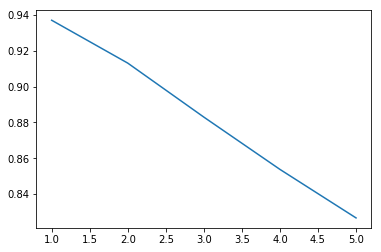

In [34]:
# 全てのkにおける確率を出力
print(all_accuracy)
plt.plot([1, 2, 3, 4, 5], all_accuracy)

In [28]:
# 一番確率の高かったkを用いて, test_datasetの予測を行う
calc_accuracy(test_distances, np.argmax(results) +1, True )

Accucacy of 1: 1.0
Accucacy of 2: 0.965
Accucacy of 3: 0.975
Accucacy of 4: 0.955
Accucacy of 5: 0.935
Accucacy of 6: 0.975
Accucacy of 7: 0.96
Accucacy of 8: 0.93
Accucacy of 9: 0.975
Accucacy of 0: 0.99
Accuracy all 0.966


0.966